Reference: https://github.com/RobMulla/twitch-stream-projects/blob/main/051-stock-sentiment/stock-sentiment.ipynb

Stock Price / Sentiment Indicators
Goal of this notebook:
1. Learn how to pull historic stock prices with python.
2. Explore stock prices and learn how to plot them.
3. Learn how to pull historic tweet data about a specific stock.
4. Run sentiment analysis on tweets.
5. See if there are any leading indicators of stock prices with sentiment. (probably not)

In [ ]:
#LIVE CODING: Stocks & Sentiment Analysis

In [2]:
!pip install yfinance
!pip install snscrape

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
import snscrape.modules.twitter as sntwitter
import pandas
from tqdm.notebook import tqdm

AttributeError: 'FileFinder' object has no attribute 'find_module'

In [ ]:
amaz = yf.Ticker("AMZN")
info = amaz.info
info = pd.json_normalize(info)
info_df = pd.DataFrame(info)
print(info_df)

                 address1     city state         zip        country  \
0  410 Terry Avenue North  Seattle    WA  98109-5210  United States   

          phone                      website         industry  \
0  206 266 1000  https://www.aboutamazon.com  Internet Retail   

       industryKey     industryDisp  ... esgPopulated  \
0  internet-retail  Internet Retail  ...        False   

  regularMarketChangePercent regularMarketPrice hasPrePostMarketData  \
0                   3.104302             228.84                 True   

   firstTradeDateMilliseconds preMarketChange  preMarketChangePercent  \
0                863703000000       -1.069992               -0.467572   

   marketState  displayName  trailingPegRatio  
0          PRE   Amazon.com            2.6591  

[1 rows x 173 columns]


In [ ]:
hist = amaz.history(start="2015-01-01", end="2025-08-01", interval="1d")
print(hist)

                                 Open        High         Low       Close  \
Date                                                                        
2015-01-02 00:00:00-05:00   15.629000   15.737500   15.348000   15.426000   
2015-01-05 00:00:00-05:00   15.350500   15.419000   15.042500   15.109500   
2015-01-06 00:00:00-05:00   15.112000   15.150000   14.619000   14.764500   
2015-01-07 00:00:00-05:00   14.875000   15.064000   14.766500   14.921000   
2015-01-08 00:00:00-05:00   15.016000   15.157000   14.805500   15.023000   
...                               ...         ...         ...         ...   
2023-12-22 00:00:00-05:00  153.770004  154.350006  152.710007  153.419998   
2023-12-26 00:00:00-05:00  153.559998  153.979996  153.029999  153.410004   
2023-12-27 00:00:00-05:00  153.559998  154.779999  153.119995  153.339996   
2023-12-28 00:00:00-05:00  153.720001  154.080002  152.949997  153.380005   
2023-12-29 00:00:00-05:00  153.100006  153.889999  151.029999  151.940002   

<Axes: xlabel='Date'>

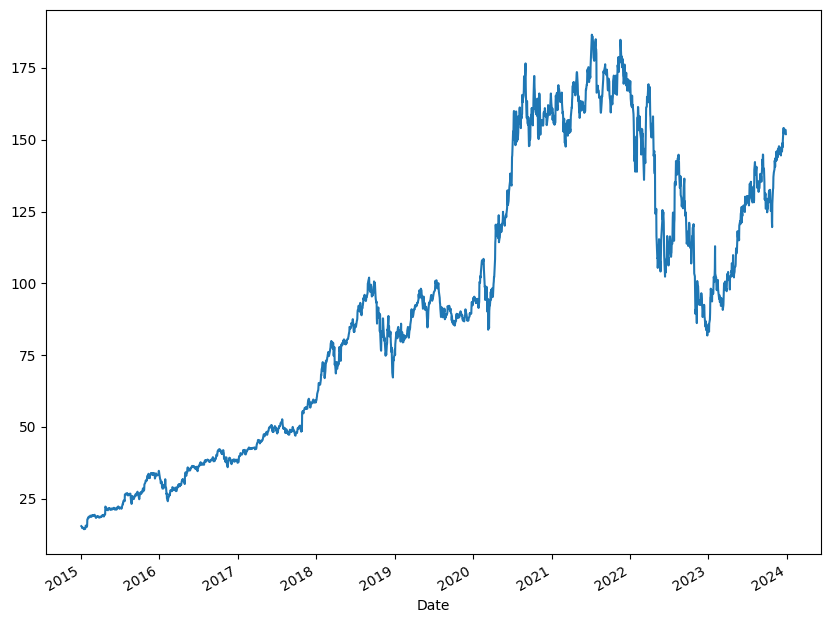

In [ ]:
hist['Close'].plot(figsize=(10,8))

In [ ]:
tickers = ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', '^GSPC']


# multi_data = yf.download(tickers, period="10y", interval="1d")
# print(multi_data.head())

In [ ]:
hists = {}
for s in tickers:
  tkr = yf.Tickers(s)
  history = tkr.history(period="10y",interval="1d")
  hists[s] = history

print(hists)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

{'AAPL': Price            Close Dividends        High         Low        Open  \
Ticker            AAPL      AAPL        AAPL        AAPL        AAPL   
Date                                                                   
2015-08-24   23.173697       0.0   24.450138   20.674748   21.319711   
2015-08-25   23.313030       0.0   24.969258   23.259097   24.969258   
2015-08-26   24.650146       0.0   24.695091   23.607420   24.065859   
2015-08-27   25.376015       0.0   25.447927   24.724310   25.220955   
2015-08-28   25.459158       0.0   25.463652   25.065888   25.207465   
...                ...       ...         ...         ...         ...   
2025-08-18  230.889999       0.0  233.119995  230.110001  231.699997   
2025-08-19  230.559998       0.0  232.869995  229.350006  231.279999   
2025-08-20  226.009995       0.0  230.470001  225.770004  229.979996   
2025-08-21  224.899994       0.0  226.520004  223.779999  226.270004   
2025-08-22  227.759995       0.0  229.089996  225.41000

#Plot the Stock Price

In [ ]:
for s in tickers:
    # if s not in hists:
    #     print(f"Warning: No data found for ticker {s}")
    #     continue

    temp_df = hists[s].copy()
    # print(temp_df.head())
    # print(temp_df.columns)

    # if temp_df.empty:
    #     print(f"Warning: DataFrame for {s} is empty")
    #     continue

    # required_columns = ["Open", "High", "Low", "Close"]
    # if not all(col in temp_df.columns for col in required_columns):
    #     print(f"Warning: DataFrame for {s} is missing required columns")
    #     continue

    # # Ensure data types are numeric
    # try:
    #     temp_df[["Open", "High", "Low", "Close"]] = temp_df[["Open", "High", "Low", "Close"]].apply(pd.to_numeric)
    # except ValueError as e:
    #     print(f"Warning: Could not convert OHLC columns to numeric for {s}: {e}")
    #     continue

    # # Ensure the index is a datetime index
    # try:
    #     temp_df.index = pd.to_datetime(temp_df.index)
    # except ValueError as e:
    #     print(f"Warning: Could not convert index to datetime for {s}: {e}")
    #     continue

    ymin = temp_df["Low"].min()
    ymax = temp_df["High"].max()
    # Add a small buffer to the y-axis range for better visualization
    ybuffer = (ymax - ymin) * 0.1  # 10% buffer
    ymin -= ybuffer
    ymax += ybuffer

    # ymax = 200
    # ymin = 0

    fig = go.Figure(
        data = [
            go.Candlestick(
                x=temp_df.index,
                open=temp_df[("Open",s)],
                high=temp_df[("High",s)],
                low=temp_df[("Low",s)],
                close=temp_df[("Close",s)],
            )
        ]
    )

    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        height=300,
        paper_bgcolor="LightSteelBlue",
        title=s,
        yaxis_range=[ymin, ymax]  # Set the y-axis range
    )

    fig.show()




#Pull tweet from API

In [ ]:
# stock = "AMZN"

In [ ]:
# tweets_list = []
# for i, tweet in tqdm(
#     enumerate(
#         sntwitter.TwitterSearchScraper(
#             f"${stock} since: 2015-01-01 until: 2025-07-31"
#         ).get_items()
#     ),
#     total=1_00000,
# ):
#   if i > 1_00000:
#     break
#   tweets_list.append(
#       [tweet.date, tweet.id, tweet.content, tweet.user.username]
#   )
#   tweet_df = pd.DataFrame(
#       tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
#   )

AttributeError: 'FileFinder' object has no attribute 'find_module'